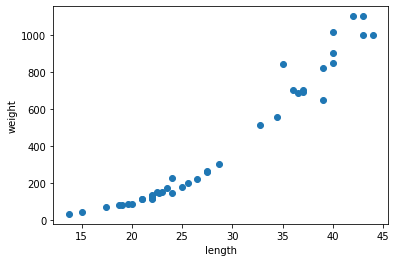

In [1]:
import numpy as np

# 농어 데이터

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])


# 데이터 분리

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)


# 데이터 분포

import matplotlib.pyplot as plt

plt.scatter(train_input, train_target)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [2]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(train_input, train_target)

# 50cm 농어에 대한 예측
print(lr.predict([[50]]))

# 계수와 절편
print(lr.coef_, lr.intercept_)

# 학습용 데이터에 대한 점수
print(lr.score(train_input, train_target))

# 평가용 데이터에 대한 점수 (낮은 것으로 보아 훈련데이터에 과대적합)
print(lr.score(test_input, test_target))

[1241.83860323]
[39.01714496] -709.0186449535477
0.9398463339976039
0.8247503123313558


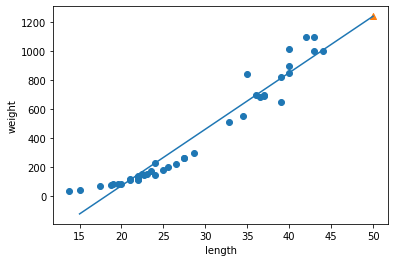

In [3]:
plt.scatter(train_input, train_target)

# 15~50cm 1차 방정식 그래프 그리기
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

# 50cm에 대해 예측한 무게 표시
plt.scatter(50, 1241.8, marker='^')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 그래프를 보면 직선 보다는 2차 함수 그래프가 보다 적합해 보임 → 다항 회귀

In [4]:
# 길이의 제곱 데이터를 추가한 다항으로 만들기

train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

In [5]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

# 다항으로 만든 데이터로 학습
lr.fit(train_poly, train_target)

# 50cm 농어에 대한 예측 (다항이기에 제곱항으로 만들어서 예측해야 함)
print(lr.predict([[50**2, 50]]))

# 계수와 절편 (다항이기에 2개로 계수가 나옴)
print(lr.coef_, lr.intercept_)

# 학습용 다항 데이터에 대한 점수
print(lr.score(train_poly, train_target))

# 평가용 다항 데이터에 대한 점수
print(lr.score(test_poly, test_target))

[1573.98423528]
[  1.01433211 -21.55792498] 116.05021078278276
0.9706807451768623
0.9775935108325122


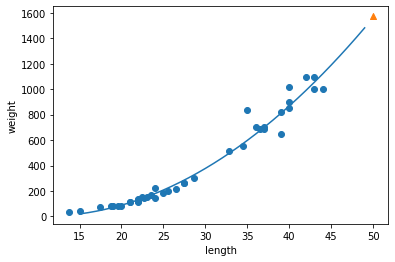

In [6]:
# 구간별 직선을 그리기 위해 15~49까지 정수 배열 만들기
point = np.arange(15, 50)

plt.scatter(train_input, train_target)

# 학습 결과로 나온 계수와 절편으로 2차 방정식 그래프 만들기
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)

# 50cm 농어 예측 결과 표시
plt.scatter([50], [1574], marker='^')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 앞의 것보다 훨씬 잘 맞는 그래프가 되었음을 알 수 있다.